# Project 1

In [62]:
import pandas as pd
data = pd.read_csv('../Data/diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [63]:
data.shape

(53940, 10)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Missing values

In [65]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [66]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [67]:
data.shape

(53940, 10)

In [68]:
# Remove 0 values from x, y, z
data = data[data['x'] != 0]
data = data[data['y'] != 0]
data = data[data['z'] != 0]

In [69]:
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


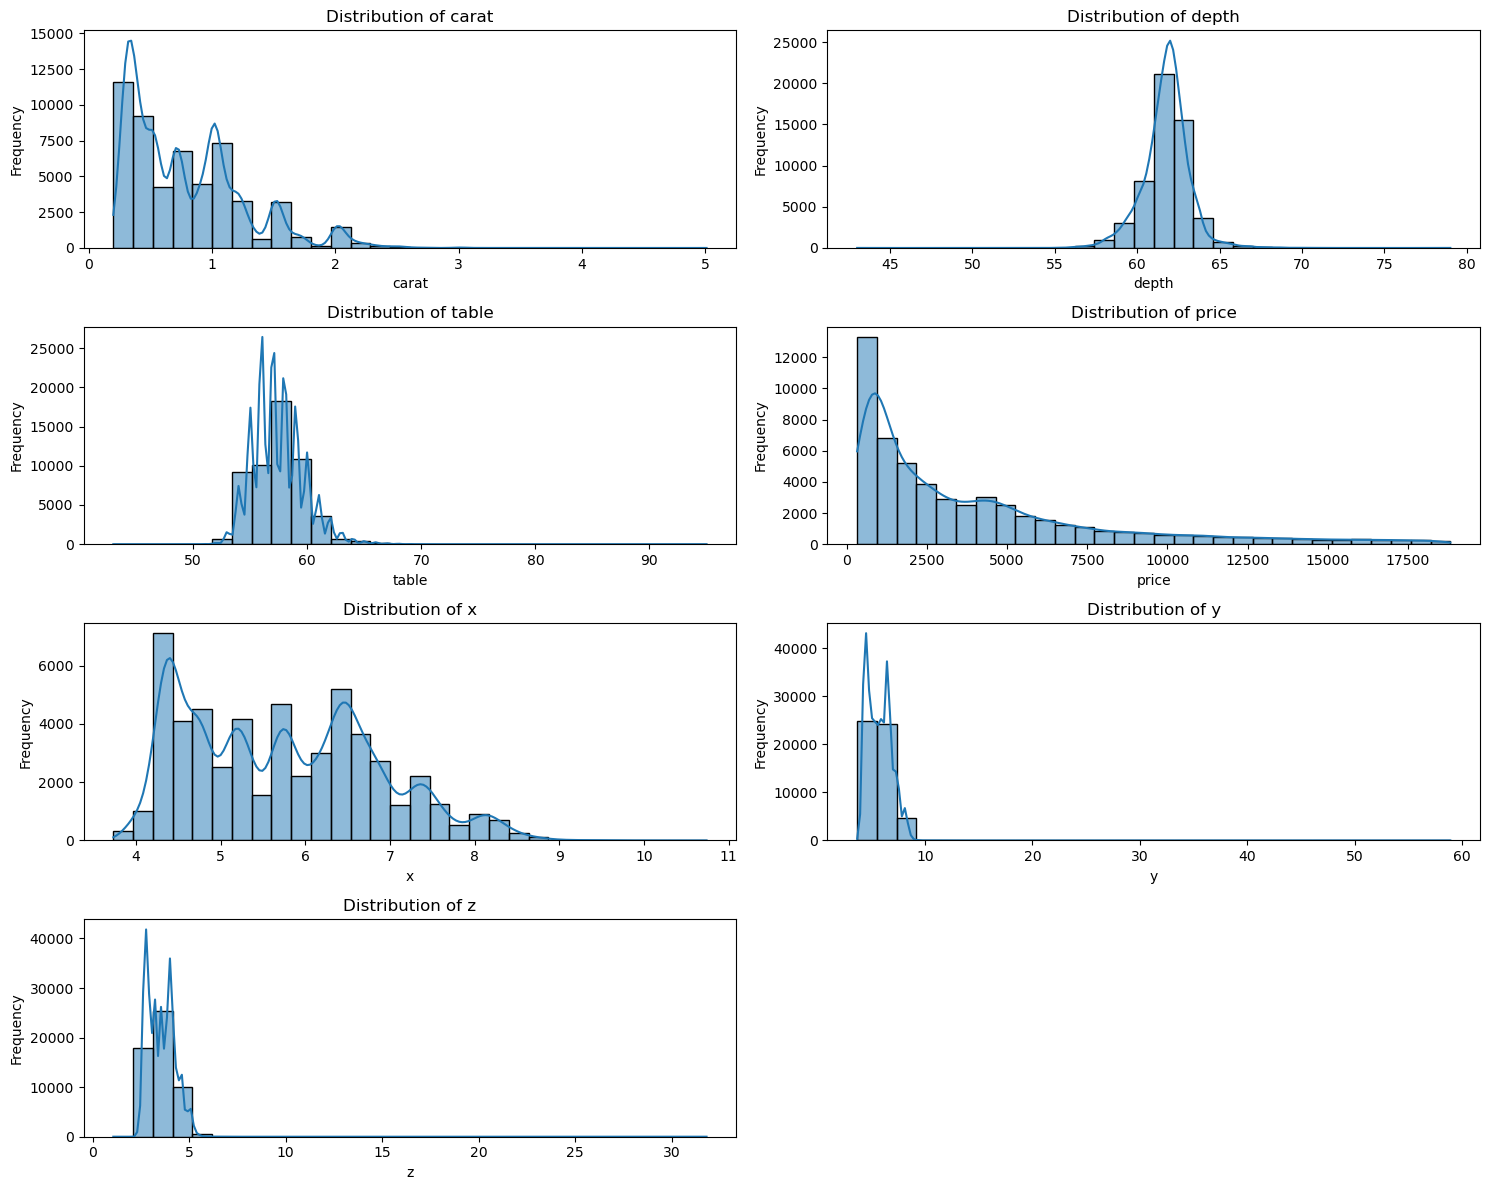

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 2, i+1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

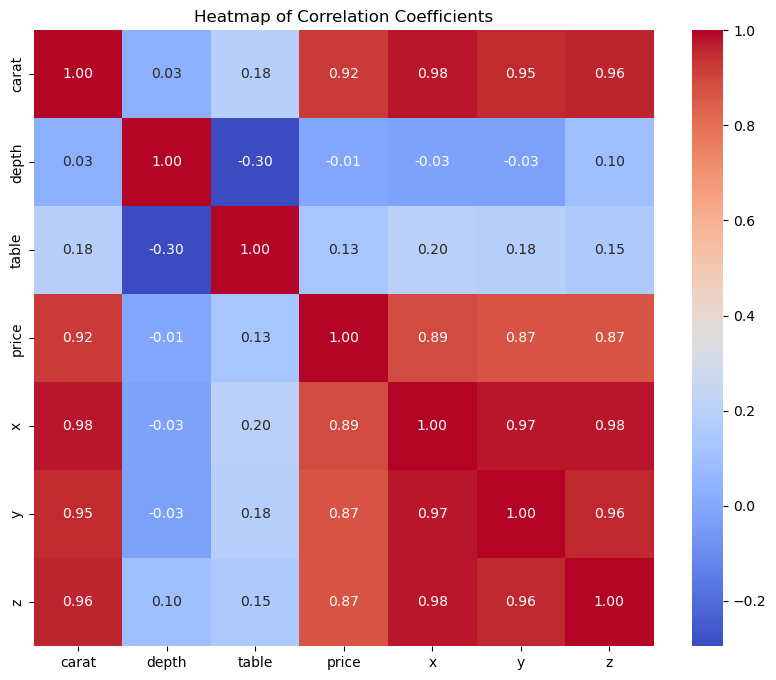

In [71]:
# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Coefficients')
plt.show()


# Outliers

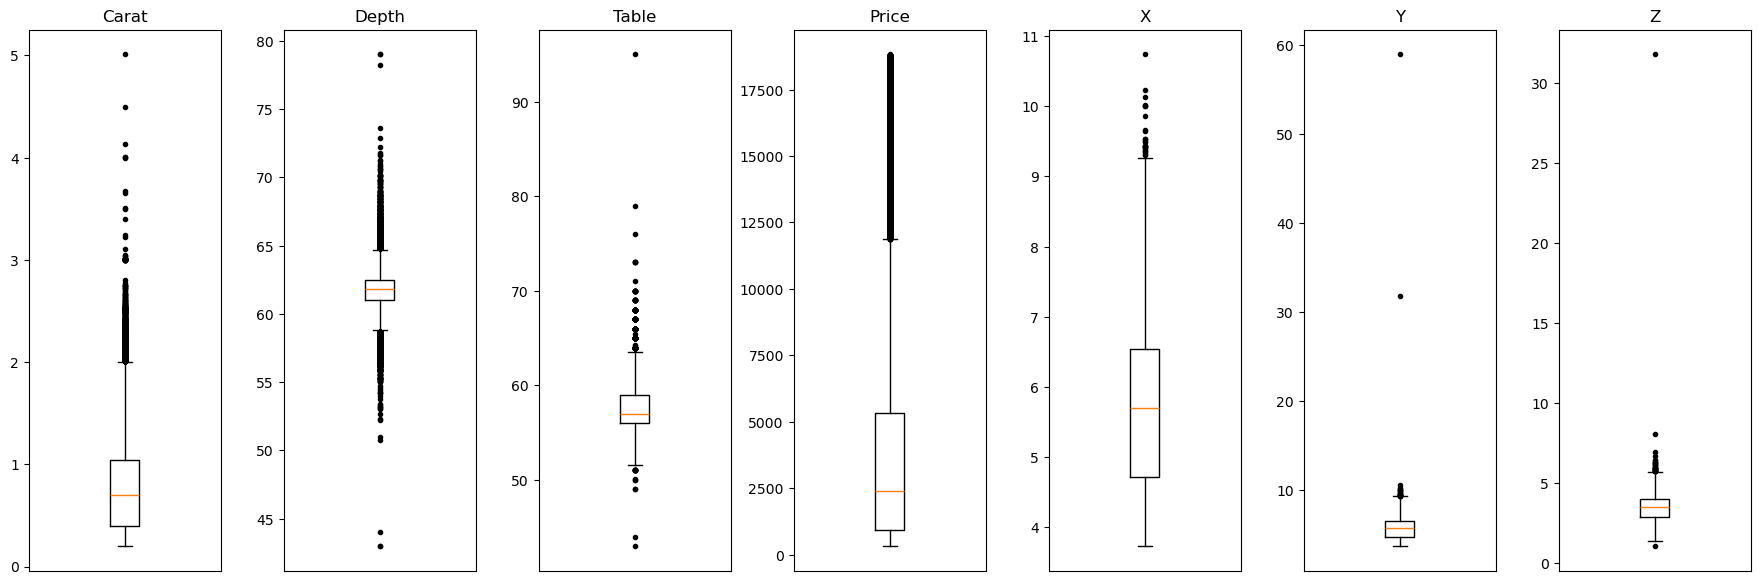

In [72]:
import matplotlib.pyplot as plt

numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

fig, axes = plt.subplots(1, 7, figsize=(18, 6)) 

fig.tight_layout()

for ax, col in zip(axes, numerical_columns):
    ax.boxplot(data[col], sym="k.")  
    ax.set_title(col.capitalize()) 
    ax.set_xticks([]) 

plt.show()


#### Standardize the values

In [73]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

diamonds_data = pd.read_csv('../Data/diamonds.csv')

means = diamonds_data[numerical_columns].mean()
stds = diamonds_data[numerical_columns].std()

print("Means:\n", means)
print("\nStandard Deviations:\n", stds)

diamonds_data_standardized = diamonds_data[numerical_columns].copy()

for column in numerical_columns:
    diamonds_data_standardized[column] = (diamonds_data[column] - means[column]) / stds[column]

print(diamonds_data_standardized.head())

Means:
 carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

Standard Deviations:
 carat       0.474011
depth       1.432621
table       2.234491
price    3989.439738
x           1.121761
y           1.142135
z           0.705699
dtype: float64
      carat     depth     table     price         x         y         z
0 -1.198157 -0.174090 -1.099662 -0.904087 -1.587823 -1.536181 -1.571115
1 -1.240350 -1.360726  1.585514 -0.904087 -1.641310 -1.658759 -1.741159
2 -1.198157 -3.384987  3.375631 -0.903836 -1.498677 -1.457382 -1.741159
3 -1.071577  0.454129  0.242926 -0.902081 -1.364959 -1.317293 -1.287708
4 -1.029384  1.082348  0.242926 -0.901831 -1.240155 -1.212227 -1.117663


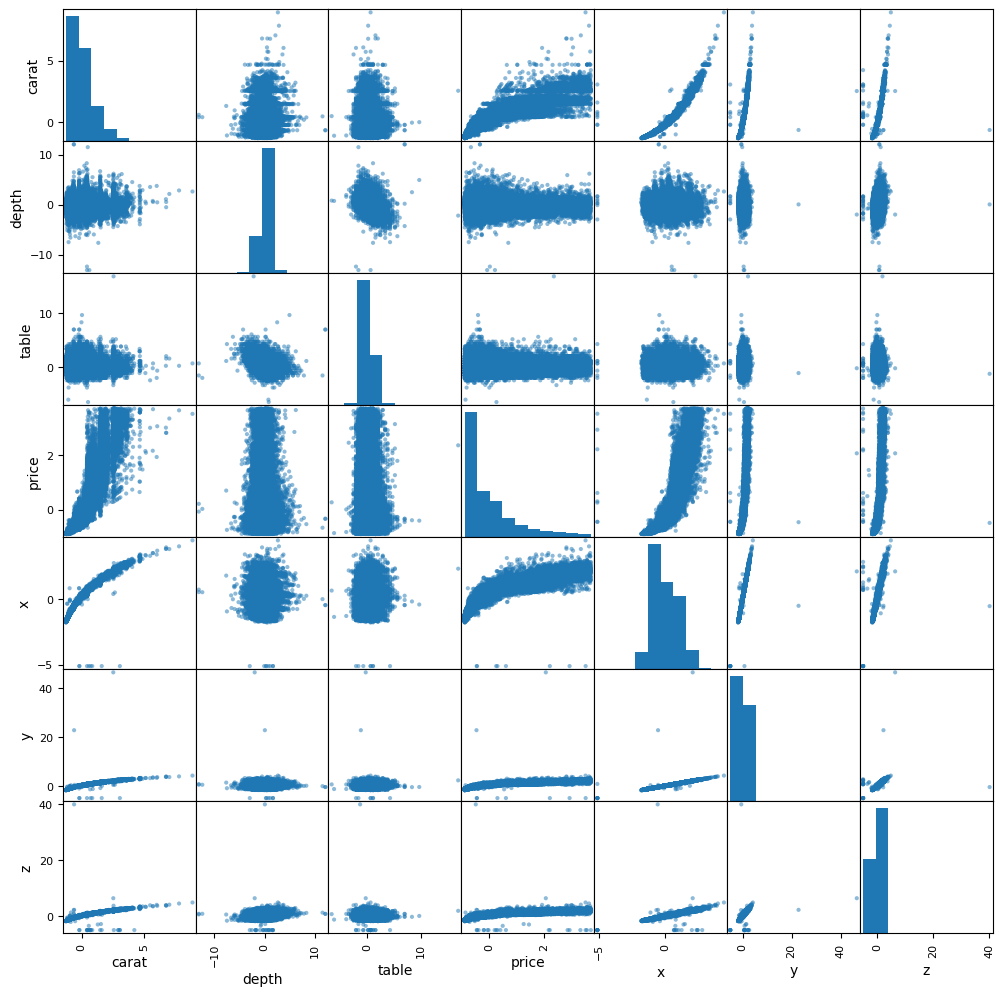

In [74]:
from pandas.plotting import scatter_matrix

scatter_matrix(diamonds_data_standardized, figsize=(12, 12))
plt.show()

### PCA

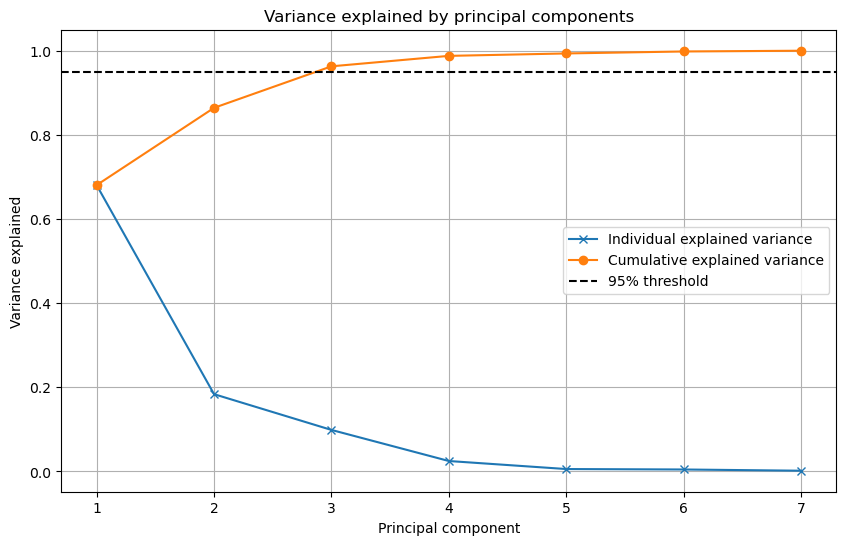

,Principal Component,Variance Explained,Cumulative Variance Explained
0,PC1,0.680559,0.680559
1,PC2,0.183695,0.864255
2,PC3,0.098687,0.962942
3,PC4,0.024822,0.987764
4,PC5,0.005758,0.993522
5,PC6,0.004707,0.998229
6,PC7,0.001771,1.000000


In [75]:
from scipy.linalg import svd
import numpy as np

# PCA using SVD
U, S, Vt = svd(diamonds_data_standardized, full_matrices=False)

# variance explained by each principal component
rho = (S ** 2) / np.sum(S ** 2)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rho) + 1), rho, 'x-', label='Individual explained variance')
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), 'o-', label='Cumulative explained variance')
plt.axhline(y=0.95, color='k', linestyle='--', label='95% threshold')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend()
plt.grid(True)
plt.show()


# display variance and cumulative variance in a table
variance_data = {
    'Principal Component': [f'PC{i+1}' for i in range(len(rho))],
    'Variance Explained': rho,
    'Cumulative Variance Explained': np.cumsum(rho)
}

variance_df = pd.DataFrame(variance_data)

display(variance_df)

In [76]:
# Print the principal directions (Vt)
print("Principal directions (Vt):\n", Vt)

# Show in a table
pc_df = pd.DataFrame(Vt.T, index=numerical_columns, columns=[f'PC{i+1}' for i in range(Vt.shape[0])])
pc_df



Principal directions (Vt):
 [[ 0.45244549 -0.00091613  0.09951609  0.42551927  0.45321251  0.4472649
   0.44595366]
 [-0.03469601 -0.73067971  0.67506738 -0.03525794  0.00351255  0.00215791
  -0.08903518]
 [-0.00549481  0.67282929  0.72806947 -0.10544948 -0.03950882 -0.05418879
   0.03960344]
 [-0.06835945 -0.047248   -0.0595406  -0.84977817  0.24299509  0.32846061
   0.31700727]
 [ 0.13399948 -0.08873829 -0.01037614 -0.05377206  0.08898016 -0.77405793
   0.60339656]
 [ 0.76815114  0.01445027 -0.02526831 -0.27330947  0.19846061 -0.21526655
  -0.4986704 ]
 [-0.42588029  0.05560026  0.00204926  0.08281429  0.82865822 -0.20885709
  -0.27995794]]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
carat,0.452445,-0.034696,-0.005495,-0.068359,0.133999,0.768151,-0.425880
depth,-0.000916,-0.730680,0.672829,-0.047248,-0.088738,0.014450,0.055600
table,0.099516,0.675067,0.728069,-0.059541,-0.010376,-0.025268,0.002049
price,0.425519,-0.035258,-0.105449,-0.849778,-0.053772,-0.273309,0.082814
x,0.453213,0.003513,-0.039509,0.242995,0.088980,0.198461,0.828658
y,0.447265,0.002158,-0.054189,0.328461,-0.774058,-0.215267,-0.208857
z,0.445954,-0.089035,0.039603,0.317007,0.603397,-0.498670,-0.279958


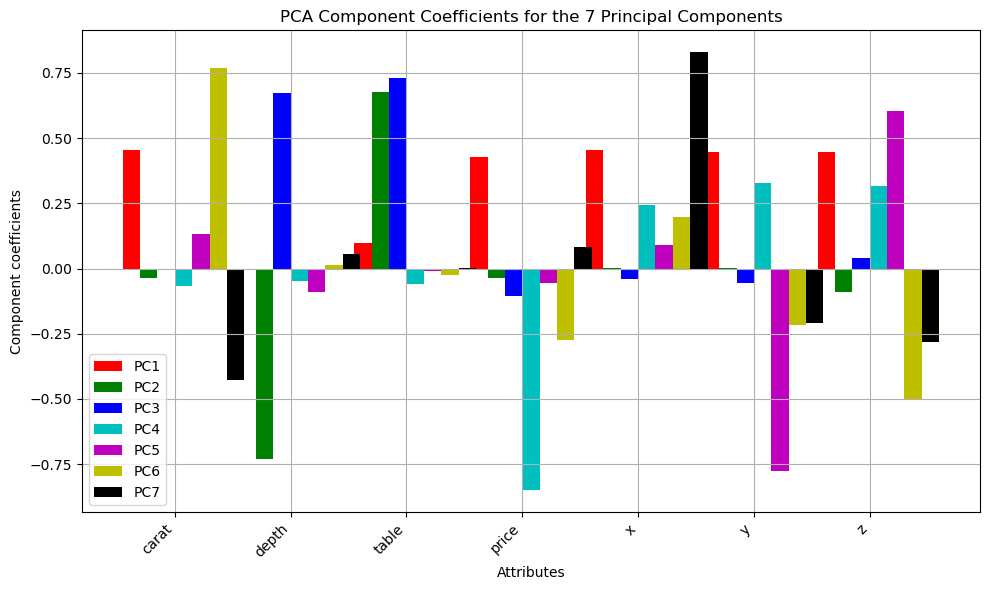

In [77]:
# Transpose Vt to get PC directions
V = Vt.T

pcs = [0, 1, 2, 3, 4, 5, 6] 

# plotting
M = diamonds_data_standardized.shape[1] 
attribute_names = numerical_columns  
legend_strs = [f"PC{e+1}" for e in pcs]  
bw = 0.15 
r = np.arange(1, M + 1) 
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] 

plt.figure(figsize=(10, 6))
for i, pc in enumerate(pcs):
    plt.bar(r + i * bw, V[:, pc], width=bw, color=colors[i], label=f"PC{pc+1}")

plt.xticks(r + bw * 2.5, attribute_names, rotation=45, ha="right")
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.title("PCA Component Coefficients for the 7 Principal Components")
plt.legend(legend_strs)
plt.grid(True)
plt.tight_layout()

plt.show()

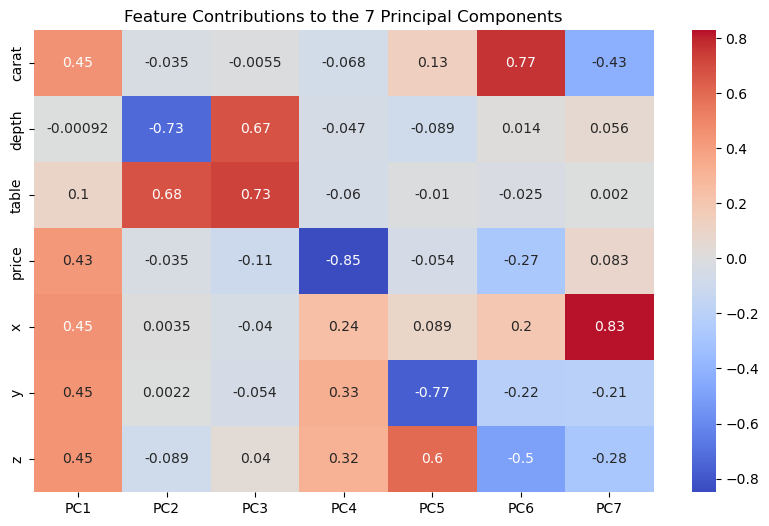

In [78]:
# Create heatmap
pc_contributions = pd.DataFrame(V[:, pcs], index=attribute_names, columns=[f"PC{i+1}" for i in pcs])

plt.figure(figsize=(10, 6))
sns.heatmap(pc_contributions, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Contributions to the 7 Principal Components")
plt.show()

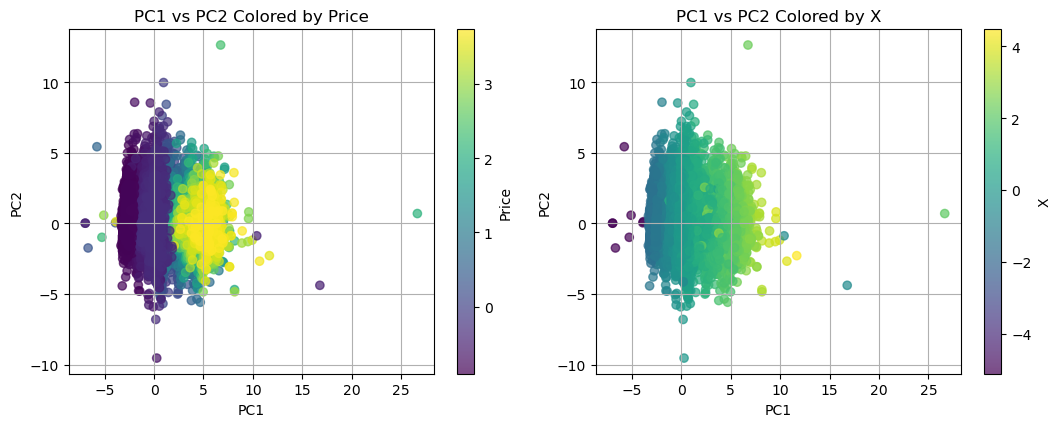

In [79]:
# project data onto some of the PCs
Z = np.dot(diamonds_data_standardized, V[:, pcs])

# Plot PC1 vs PC2 colored by price and x
numerical_features_to_plot = ['price', 'x']
plt.figure(figsize=(16, 12))

for i, feature in enumerate(numerical_features_to_plot):
    plt.subplot(3, 3, i + 1)  # Create subplots
    scatter = plt.scatter(Z[:, 0], Z[:, 1], c=diamonds_data_standardized[feature], cmap='viridis', alpha=0.7)
    plt.title(f"PC1 vs PC2 Colored by {feature.capitalize()}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    cbar = plt.colorbar(scatter)
    cbar.set_label(feature.capitalize())

plt.tight_layout()
plt.show()



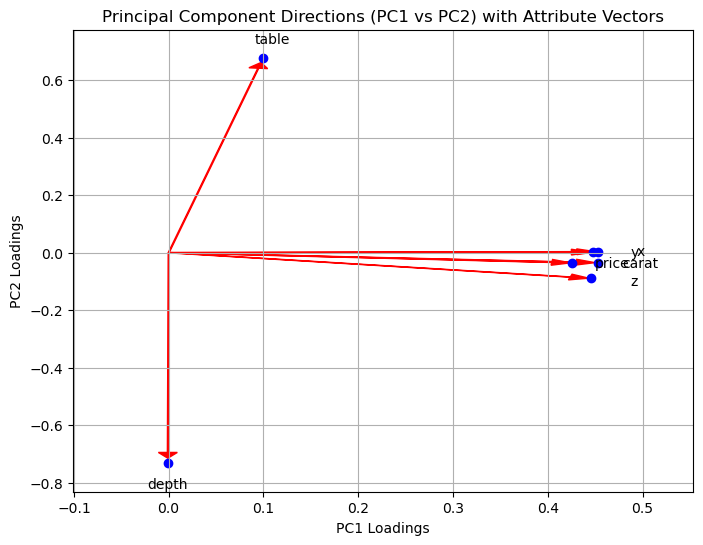

In [80]:
pc1_loadings = V[:, 0] 
pc2_loadings = V[:, 1]

# Scale vectors
scaling_factor = 0.95

plt.figure(figsize=(8, 6))

# Add vectors for each attribute from (0,0))
for i, feature in enumerate(attribute_names):
    # Draw vectors
    plt.arrow(0, 0, pc1_loadings[i] * scaling_factor, pc2_loadings[i] * scaling_factor, 
              head_width=0.02, head_length=0.02, fc='r', ec='r')

    # Draw dots
    plt.scatter(pc1_loadings[i], pc2_loadings[i], color='b')

    # Add labels
    plt.text(pc1_loadings[i] * 1.1, pc2_loadings[i] * 1.1, feature, ha='center', va='center', fontsize=10)

plt.xlim(min(pc1_loadings) - 0.1, max(pc1_loadings) + 0.1)
plt.ylim(min(pc2_loadings) - 0.1, max(pc2_loadings) + 0.1)

plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.title('Principal Component Directions (PC1 vs PC2) with Attribute Vectors')

plt.grid(True)

plt.show()

---
# Project 2
---

## Regression Part A

### 1. Data prep & One-of-K coding

In [93]:
from sklearn import model_selection
from dtuimldmtools import rlr_validate

# Remove rows with 0 values in x, y, z
data = data[(data['x'] > 0) & (data['y'] > 0) & (data['z'] > 0)]

# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)

# Separate features (X) and target (y)
X = data_encoded.drop(columns=['price'], axis=1).values 
y = data_encoded['price'].values 

# X to NumPy array of float
X = X.astype(np.float64)

# Standardize the feature matrix
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std


### 2. Regularization with inspiration from script ex8_1_1

In [ ]:
# Add offset (bias) column
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
attributeNames = np.array(["Offset"] + list(data_encoded.drop(columns=['price']).columns))
M = X.shape[1]

# Cross-validation setup
K = 10
CV = model_selection.KFold(K, shuffle=True, random_state=42)

# Define the range of regularization parameters
lambdas = np.power(10.0, range(-5, 8))

# Initialize storage for errors and model weights
Gen_error = np.zeros(len(lambdas))
Error_train_rlr = np.empty(K)
Error_test_rlr = np.empty(K)
w_rlr = np.empty((M, K))

# Perform K-fold cross-validation
for k, (train_index, test_index) in enumerate(CV.split(X, y)):
    # Split data into training and test sets
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    # Inner cross-validation for optimal lambda
    internal_cross_validation = 10
    (
        opt_val_err,
        opt_lambda,
        mean_w_vs_lambda,
        train_err_vs_lambda,
        test_err_vs_lambda,
    ) = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)

    Gen_error += (len(y_test) / len(y)) * test_err_vs_lambda

    # Compute weights for the optimal lambda
    XtX = X_train.T @ X_train
    Xty = X_train.T @ y_train
    lambdaI = opt_lambda * np.eye(M)
    lambdaI[0, 0] = 0  # Do not regularize the bias term
    w_rlr[:, k] = np.linalg.solve(XtX + lambdaI, Xty).squeeze()

    # Calculate training and test errors with regularization
    Error_train_rlr[k] = (
        np.square(y_train - X_train @ w_rlr[:, k]).sum() / len(y_train)
    )
    Error_test_rlr[k] = (
        np.square(y_test - X_test @ w_rlr[:, k]).sum() / len(y_test)
    )


### Plotting

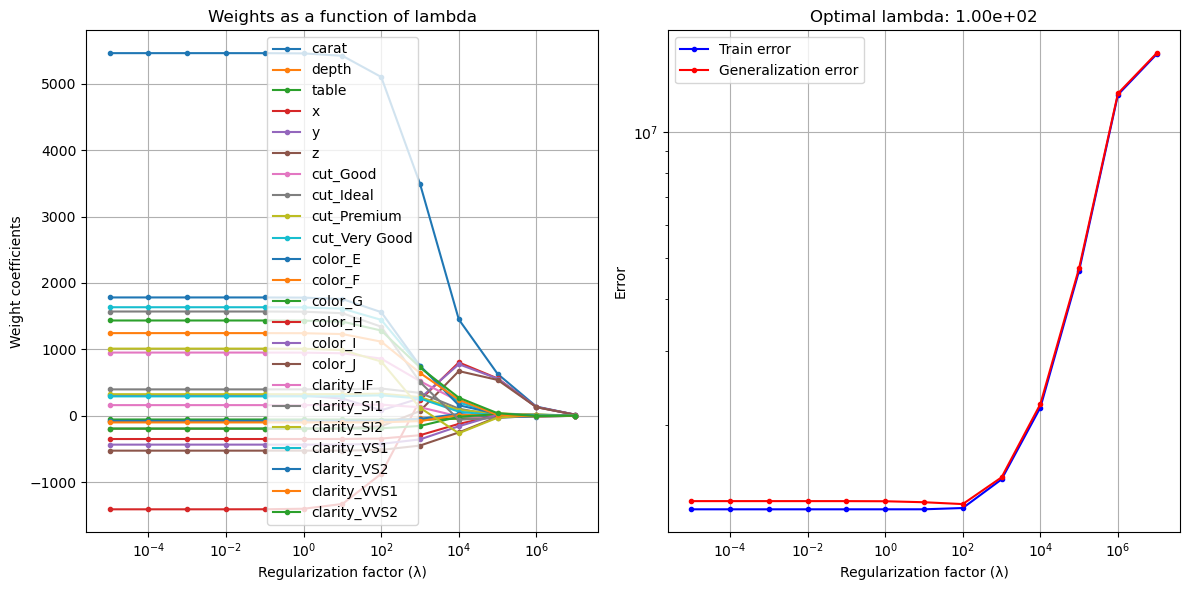

Optimal lambda: 100.0000
Mean training error (regularized): 1276149.9358
Mean test error (regularized): 1298512.8773

Weights (last fold):
         Offset: 3929.6827
          carat: 5144.0689
          depth: -78.3573
          table: -58.4977
              x: -930.5735
              y: 54.4212
              z: -106.8991
       cut_Good: 166.5105
      cut_Ideal: 408.9276
    cut_Premium: 332.4781
  cut_Very Good: 305.7871
        color_E: -75.2422
        color_F: -100.5998
        color_G: -190.4214
        color_H: -345.8222
        color_I: -426.2884
        color_J: -514.5077
     clarity_IF: 866.5038
    clarity_SI1: 1359.4616
    clarity_SI2: 834.4856
    clarity_VS1: 1460.6154
    clarity_VS2: 1579.8102
   clarity_VVS1: 1131.2038
   clarity_VVS2: 1298.9426


In [94]:
# Plot results
plt.figure(figsize=(12, 6))

# Weights vs. lambda
plt.subplot(1, 2, 1)
plt.title("Weights as a function of lambda")
plt.semilogx(lambdas, mean_w_vs_lambda.T[:, 1:], ".-")  # Exclude bias term
plt.xlabel("Regularization factor (λ)")
plt.ylabel("Weight coefficients")
plt.grid()
plt.legend(attributeNames[1:], loc="best")

# Train and generalization errors vs. lambda
plt.subplot(1, 2, 2)
plt.title(f"Optimal lambda: {opt_lambda:.2e}")
plt.loglog(lambdas, train_err_vs_lambda.T, "b.-", label="Train error")
plt.loglog(lambdas, Gen_error, "r.-", label="Generalization error")
plt.xlabel("Regularization factor (λ)")
plt.ylabel("Error")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Display summary
print(f"Optimal lambda: {opt_lambda:.4f}")
print(f"Mean training error (regularized): {Error_train_rlr.mean():.4f}")
print(f"Mean test error (regularized): {Error_test_rlr.mean():.4f}")
print("\nWeights (last fold):")
for m in range(M):
    print(f"{attributeNames[m]:>15}: {w_rlr[m, -1]:.4f}")

# Classification

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold

# Load data
data = pd.read_csv('../Data/diamonds_cleaned.csv')
# Preprocess data
X = data.drop(columns=['price'], axis=1)  # Assuming 'price' is the target variable
y = data['price']
categorical_columns = ['cut', 'color', 'clarity']

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X[categorical_columns])
X_non_categorical = X.drop(columns=categorical_columns)
X_encoded = pd.concat(
    [X_non_categorical.reset_index(drop=True),
     pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns))],
    axis=1
)

# Standardize features
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)

# Bin target variable
bins = [0, 950, 5300, data['price'].max()]
labels = ['Low', 'Medium', 'High']
data['price_category'] = pd.cut(data['price'], bins=bins, labels=labels)
X = X_std.values
y = data['price_category'].values

# Models and parameters
baseline_model = DummyClassifier(strategy="most_frequent")
logistic_params = [1000, 500, 100, 10, 1 ]
knn_params = [3, 5, 7, 9, 11]

# Set up cross-validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Results table
results_table = {
    "Outer Fold": [],
    "Method 2 (k*)": [],
    "Method 2 E_test": [],
    "Logistic (λ*)": [],
    "Logistic E_test": [],
    "Baseline E_test": []
}

# Loop through outer folds
fold_number = 1
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Baseline model
    baseline_model.fit(X_train, y_train)
    baseline_pred = baseline_model.predict(X_test)
    baseline_error = 1 - accuracy_score(y_test, baseline_pred)
    
    # Logistic Regression with inner CV
    best_logistic_score, best_logistic_model, best_C = 0, None, None
    for C in logistic_params:
        inner_scores = []
        for inner_train_idx, inner_test_idx in inner_cv.split(X_train, y_train):
            model = LogisticRegression(C=C, max_iter=1000)
            model.fit(X[inner_train_idx], y[inner_train_idx])
            inner_scores.append(accuracy_score(y[inner_test_idx], model.predict(X[inner_test_idx])))
        avg_inner_score = np.mean(inner_scores)
        if avg_inner_score > best_logistic_score:
            best_logistic_score = avg_inner_score
            best_logistic_model = LogisticRegression(C=C, max_iter=1000)
            best_lambda = 1 / C
    
    # Train best logistic model on outer train and evaluate on outer test
    best_logistic_model.fit(X_train, y_train)
    logistic_pred = best_logistic_model.predict(X_test)
    logistic_error = 1 - accuracy_score(y_test, logistic_pred)
    
    # k-Nearest Neighbors (kNN) with inner CV
    best_knn_score, best_knn_model, best_k = 0, None, None
    for k in knn_params:
        inner_scores = []
        for inner_train_idx, inner_test_idx in inner_cv.split(X_train, y_train):
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X[inner_train_idx], y[inner_train_idx])
            inner_scores.append(accuracy_score(y[inner_test_idx], model.predict(X[inner_test_idx])))
        avg_inner_score = np.mean(inner_scores)
        if avg_inner_score > best_knn_score:
            best_knn_score = avg_inner_score
            best_knn_model = KNeighborsClassifier(n_neighbors=k)
            best_k = k
    
    # Train best kNN model on outer train and evaluate on outer test
    best_knn_model.fit(X_train, y_train)
    knn_pred = best_knn_model.predict(X_test)
    knn_error = 1 - accuracy_score(y_test, knn_pred)
    
    # Append results
    results_table["Outer Fold"].append(fold_number)
    results_table["Method 2 (k*)"].append(best_k)
    results_table["Method 2 E_test"].append(knn_error)
    results_table["Logistic (λ*)"].append(best_lambda)
    results_table["Logistic E_test"].append(logistic_error)
    results_table["Baseline E_test"].append(baseline_error)
    
    fold_number += 1

# Convert results to DataFrame
results_df = pd.DataFrame(results_table)
print(results_df)


   Outer Fold  Method 2 (k*)  Method 2 E_test  Logistic (λ*)  Logistic E_test  \
0           1              5         0.086678          0.001         0.057291   
1           2              5         0.086771          0.001         0.061741   
2           3              5         0.084925          0.002         0.059058   
3           4              5         0.086594          0.002         0.057575   
4           5              7         0.087614          0.002         0.058038   

   Baseline E_test  
0         0.501530  
1         0.501530  
2         0.501483  
3         0.501483  
4         0.501576  


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from scipy.stats import t

# Load data
data = pd.read_csv('../Data/diamonds_cleaned.csv')
# Preprocess data
X = data.drop(columns=['price'], axis=1)  # Assuming 'price' is the target variable
y = data['price']
categorical_columns = ['cut', 'color', 'clarity']

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X[categorical_columns])
X_non_categorical = X.drop(columns=categorical_columns)
X_encoded = pd.concat(
    [X_non_categorical.reset_index(drop=True),
     pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns))],
    axis=1
)

# Standardize features
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)

# Bin target variable
bins = [0, 950, 5300, data['price'].max()]
labels = ['Low', 'Medium', 'High']
data['price_category'] = pd.cut(data['price'], bins=bins, labels=labels)
X = X_std.values
y = data['price_category'].values

# Models and parameters
baseline_model = DummyClassifier(strategy="most_frequent")
logistic_params = [1000, 500, 100, 10, 0.1]
knn_params = [3, 5, 7, 9, 11]

# Set up cross-validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store error differences for statistical analysis
error_diffs_log_knn = []
error_diffs_log_baseline = []
error_diffs_knn_baseline = []

# Loop through outer folds
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Baseline model
    baseline_model.fit(X_train, y_train)
    baseline_pred = baseline_model.predict(X_test)
    baseline_error = 1 - accuracy_score(y_test, baseline_pred)
    
    # Logistic Regression with inner CV
    best_logistic_score, best_logistic_model, best_C = 0, None, None
    for C in logistic_params:
        inner_scores = []
        for inner_train_idx, inner_test_idx in inner_cv.split(X_train, y_train):
            model = LogisticRegression(C=C, max_iter=1000)
            model.fit(X[inner_train_idx], y[inner_train_idx])
            inner_scores.append(accuracy_score(y[inner_test_idx], model.predict(X[inner_test_idx])))
        avg_inner_score = np.mean(inner_scores)
        if avg_inner_score > best_logistic_score:
            best_logistic_score = avg_inner_score
            best_logistic_model = LogisticRegression(C=C, max_iter=1000)
    
    # Train best logistic model on outer train and evaluate on outer test
    best_logistic_model.fit(X_train, y_train)
    logistic_pred = best_logistic_model.predict(X_test)
    logistic_error = 1 - accuracy_score(y_test, logistic_pred)
    
    # k-Nearest Neighbors (kNN) with inner CV
    best_knn_score, best_knn_model, best_k = 0, None, None
    for k in knn_params:
        inner_scores = []
        for inner_train_idx, inner_test_idx in inner_cv.split(X_train, y_train):
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X[inner_train_idx], y[inner_train_idx])
            inner_scores.append(accuracy_score(y[inner_test_idx], model.predict(X[inner_test_idx])))
        avg_inner_score = np.mean(inner_scores)
        if avg_inner_score > best_knn_score:
            best_knn_score = avg_inner_score
            best_knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # Train best kNN model on outer train and evaluate on outer test
    best_knn_model.fit(X_train, y_train)
    knn_pred = best_knn_model.predict(X_test)
    knn_error = 1 - accuracy_score(y_test, knn_pred)
    
    # Calculate error differences
    error_diffs_log_knn.append(logistic_error - knn_error)
    error_diffs_log_baseline.append(logistic_error - baseline_error)
    error_diffs_knn_baseline.append(knn_error - baseline_error)

# Convert lists to arrays
error_diffs_log_knn = np.array(error_diffs_log_knn)
error_diffs_log_baseline = np.array(error_diffs_log_baseline)
error_diffs_knn_baseline = np.array(error_diffs_knn_baseline)

# Calculate means and standard errors
mean_log_knn = np.mean(error_diffs_log_knn)
std_log_knn = np.std(error_diffs_log_knn, ddof=1) / np.sqrt(len(error_diffs_log_knn))

mean_log_baseline = np.mean(error_diffs_log_baseline)
std_log_baseline = np.std(error_diffs_log_baseline, ddof=1) / np.sqrt(len(error_diffs_log_baseline))

mean_knn_baseline = np.mean(error_diffs_knn_baseline)
std_knn_baseline = np.std(error_diffs_knn_baseline, ddof=1) / np.sqrt(len(error_diffs_knn_baseline))

# Calculate confidence intervals and p-values
alpha = 0.05
df = len(error_diffs_log_knn) - 1
t_crit = t.ppf(1 - alpha / 2, df)

ci_log_knn = (mean_log_knn - t_crit * std_log_knn, mean_log_knn + t_crit * std_log_knn)
ci_log_baseline = (mean_log_baseline - t_crit * std_log_baseline, mean_log_baseline + t_crit * std_log_baseline)
ci_knn_baseline = (mean_knn_baseline - t_crit * std_knn_baseline, mean_knn_baseline + t_crit * std_knn_baseline)

p_value_log_knn = 2 * t.cdf(-abs(mean_log_knn / std_log_knn), df)
p_value_log_baseline = 2 * t.cdf(-abs(mean_log_baseline / std_log_baseline), df)
p_value_knn_baseline = 2 * t.cdf(-abs(mean_knn_baseline / std_knn_baseline), df)

# Output results
print("Logistic vs kNN:")
print("Confidence Interval:", ci_log_knn)
print("P-value:", p_value_log_knn)

print("\nLogistic vs Baseline:")
print("Confidence Interval:", ci_log_baseline)
print("P-value:", p_value_log_baseline)

print("\nkNN vs Baseline:")
print("Confidence Interval:", ci_knn_baseline)
print("P-value:", p_value_knn_baseline)


Logistic vs kNN:
Confidence Interval: (-0.030450631328552552, -0.02510084586951073)
P-value: 8.615541222875139e-06

Logistic vs Baseline:
Confidence Interval: (-0.4450225356565022, -0.4405371147395809)
P-value: 6.645486578799506e-11

kNN vs Baseline:
Confidence Interval: (-0.41618167079320767, -0.4138265024048119)
P-value: 6.54561171944541e-12
